In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
Final_Kpis = pd.read_csv('../dataset/final_kpis.csv',  encoding= 'unicode_escape')
Final_Kpis

,Unnamed: 0,Min,Median,Mean,Max,Std
0,$/Txn_variation,0.12,0.94,1.11,2.55,0.49
1,$/Buyer_variation,0.34,0.99,1.16,2.82,0.48
2,Txn/Buyer_variation,0.87,1.01,1.09,2.94,0.33


### Cleaning Conclusion 
We can see that although the NFT market as a whole has seen sharp declines in floor prices and sales volumes within collections, the top collections, these are the ones that have managed to stay in the top 100 since November 2021 until now, have experienced: 
1. An increase in dollars spent per transaction
2. An increase in dollars spent per buyer 
3. An increase in transactions per buyer 

Shown by the mean being > 1.

Although values have a quite high standard deviation, the median suggests that ratios have remained constant, which is quite impressive taking into account market conditions. We need to consider that this sample contains mainly ethereum projects, so it may be a bit biased for the rest of blockchains.

## Visualization

In [50]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [51]:
NFT_data = pd.read_csv("../dataset/NFT_data.csv", encoding= 'unicode_escape')

In [52]:
# create dataframe for blockchain sales
blockchain_sales = NFT_data.groupby('blockchainId').agg({'USD_Sales_in_millions_not_updated' : 'sum', 'USD_Sales_in_millions_Updated' : 'sum',})
display(blockchain_sales)

,USD_Sales_in_millions_not_updated,USD_Sales_in_millions_Updated
blockchainId,,
ethereum,7174.529747,13961.664810
flow,781.965423,1033.386630
ronin,3328.148500,4090.984209
solana,341.830698,478.280755
wax,142.416548,196.437432


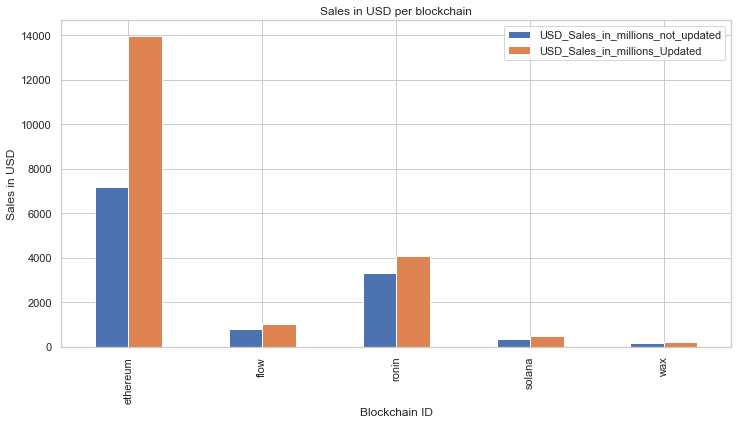

In [53]:
#Top collections are usually built in ethereum as sales have increased much more proportionately to the rest of blockchains.
graph_1 = blockchain_sales.plot.bar()
plt.title('Sales in USD per blockchain')
plt.xlabel('Blockchain ID')
plt.ylabel('Sales in USD')
graph_1.figure.savefig('../images/Results/Graph_1.png', dpi=1000)

In [54]:
#Create a dataframe for blockchain transactions
blockchains_transactions = NFT_data.groupby('blockchainId').agg({'Txns_not_updated' : 'sum', 'Txns_Updated': 'sum'},)
display(blockchains_transactions)

,Txns_not_updated,Txns_Updated
blockchainId,,
ethereum,1437917,5071153
flow,11790699,21862169
ronin,9755511,17718939
solana,54262,80819
wax,456350,5414003


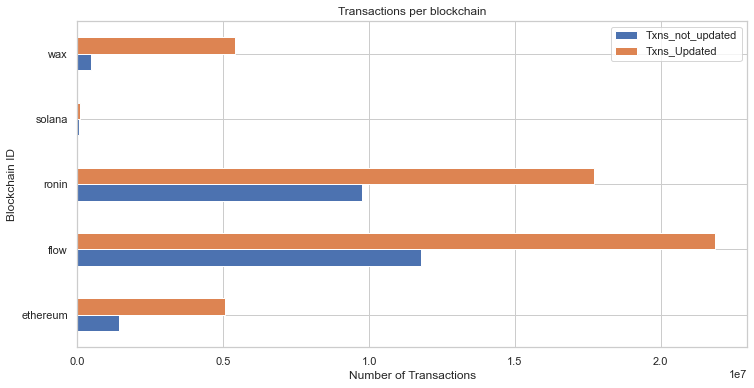

In [55]:
# Even though collections in ethereum receive more funding, we can see that other blockchains (with less projects in the top 100) manage to process more transactions. 
# This suggests that collections built on ethereum might be more expensive.
graph_2 = blockchains_transactions.plot.barh()
plt.title('Transactions per blockchain')
plt.xlabel('Number of Transactions')
plt.ylabel('Blockchain ID')
graph_2.figure.savefig('../images/Results/Graph_2.png', dpi=1000)

In [56]:
NFT_kpis = pd.read_csv("../dataset/NFT_kpis.csv", encoding= 'unicode_escape')

In [57]:
# Create a dataframe calculating the mean of the variation KPIs
blockchain_kpi = NFT_kpis.groupby('blockchainId').agg({'$/Txn_variation' :'mean', '$/Buyer_variation':'mean', 'Txn/Buyer_variation' : 'mean'},)
display(blockchain_kpi)

,$/Txn_variation,$/Buyer_variation,Txn/Buyer_variation
blockchainId,,,
ethereum,1.180057,1.213464,1.042033
flow,0.712121,1.108821,1.555938
ronin,0.674487,0.740753,1.094679
solana,0.928607,0.912063,0.978171
wax,0.115385,0.342170,2.943014


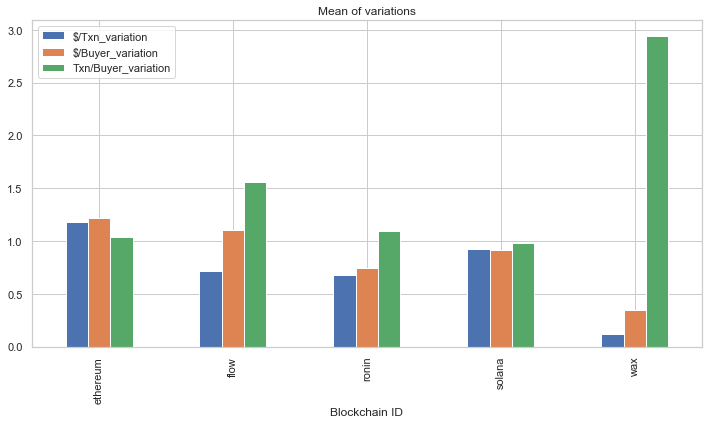

In [58]:
# projects built on top of ethereum (and solana, but less representative) are the most resilient to market conditions shown by the mean of the following ratios:
#1. $/Txn_variation > 1
#2. $/Buyer_variation > 1
#3. Txn/Buyer_variation > 1
#Blockchains such as flow and wax have seen a reduction in dollars spent per transaction and an increase in transactions per buyer, suggesting that there is demand for low priced NFT collections.
graph_3 = blockchain_kpi.plot.bar()
plt.title('Mean of variations')
plt.xlabel('Blockchain ID')
graph_3.figure.savefig('../images/Results/Graph_3.png', dpi=1000)

### Visualization Conclusions

In Graph 1, we see that top collections are usually built in ethereum as Sales have increased much more proportionately to the rest of blockchains.

Graph 2 shows something very interesting, even though collections in ethereum receive more funding, we can see that other blockchains (with less projects in the top 100) manage to process more transactions. This suggests that collections built on ethereum might be more expensive.

Graph 3 suggests that projects built on top of ethereum (and solana, but less representative) are the most resilient to market conditions shown by the mean of the following ratios:
1. $/Txn_variation > 1
2. $/Buyer_variation > 1
3. Txn/Buyer_variation > 1

Blockchains such as flow and wax have seen a reduction in dollars spent per transaction and an increase in transactions per buyer, suggesting that there is demand for low priced NFT collections.